### Load the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing

import numpy.random as nr
import scipy.stats as ss
import math
#import missingno as mn           # For visualizing missing values.
from scipy import stats          # For statistics

%matplotlib inline

In [2]:
'''Customize visualization.'''
plt.rcParams['figure.figsize'] = [18,2.5]  # Create all the figure size by this dimension
plt.style.use('ggplot')                    # Use ggplot's style for plotting
sns.set_style({'axes.grid' : False})       # Removes gridlines

In [2]:
'''Displays markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))



<center><h2><i>TRAIN & TEST DATASETS</i></h2></center>

### Load the datasets

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [5]:
bold('**Train data:**')
display(train_data.head())

**Train data:**

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [268]:
bold('**Train/Test shape:**')
display(train_data.shape,test_data.shape)

**Train/Test shape:**

(4990, 13)

(3532, 12)

In [6]:
unique_train = len(train_data['Product_Identifier'].unique())
unique_train

1451

In [7]:
train_data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

merged = pd.concat([train_data, test_data])
bold('**Merged data:**')
display(merged.iloc[4986:4999,:])

In [6]:
train_data.columns = [str.replace(' _', '_') for str in train_data.columns]
test_data.columns = [str.replace(' _', '_') for str in test_data.columns]

In [7]:
bold('**Name of the variables:**')
display(test_data.columns)

**Name of the variables:**

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket_Size',
       'Supermarket_Location_Type', 'Supermarket_Type'],
      dtype='object')

In [175]:
#train_data['Supermarket_Size'].fillna('NaN', inplace=True)

In [273]:
train_data.head(5)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [228]:
train_data.groupby(['Supermarket_Opening_Year','Supermarket_Identifier','Supermarket_Type','Supermarket_Location_Type','Supermarket_Size'])['Supermarket_Size'].count()

Supermarket_Opening_Year  Supermarket_Identifier  Supermarket_Type   Supermarket_Location_Type  Supermarket_Size
1992                      CHUKWUDI019             Grocery Store      Cluster 1                  Small               340
                          CHUKWUDI027             Supermarket Type3  Cluster 3                  Medium              462
1994                      CHUKWUDI013             Supermarket Type1  Cluster 3                  High                594
2004                      CHUKWUDI046             Supermarket Type1  Cluster 1                  Small               509
2006                      CHUKWUDI049             Supermarket Type1  Cluster 1                  Medium              620
2011                      CHUKWUDI035             Supermarket Type1  Cluster 2                  Small               515
2016                      CHUKWUDI018             Supermarket Type2  Cluster 3                  Medium              500
Name: Supermarket_Size, dtype: int64

In [8]:
train_data.loc[train_data['Supermarket_Opening_Year'] == 2005,'Supermarket_Size'] = 'Medium'
train_data.loc[train_data['Supermarket_Opening_Year'] == 2009,'Supermarket_Size'] = 'Small'
train_data.loc[train_data['Supermarket_Opening_Year'] == 2014,'Supermarket_Size'] = 'Small'

test_data.loc[test_data['Supermarket_Opening_Year'] == 2005,'Supermarket_Size'] = 'Medium'
test_data.loc[test_data['Supermarket_Opening_Year'] == 2009,'Supermarket_Size'] = 'Small'
test_data.loc[test_data['Supermarket_Opening_Year'] == 2014,'Supermarket_Size'] = 'Small'

In [11]:
train_data[20:70]

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
20,DRB01,CHUKWUDI049,DRB01_CHUKWUDI049,7.390,Low Fat,0.082367,Soft Drinks,469.38,2006,Medium,Cluster 1,Supermarket Type1,3795.06
21,DRB13,CHUKWUDI017,DRB13_CHUKWUDI017,6.115,Normal Fat,0.007084,Soft Drinks,477.88,2014,Small,Cluster 2,Supermarket Type1,8538.89
22,DRB13,CHUKWUDI035,DRB13_CHUKWUDI035,6.115,Normal Fat,0.007043,Soft Drinks,475.88,2011,Small,Cluster 2,Supermarket Type1,1423.15
23,DRB13,CHUKWUDI049,DRB13_CHUKWUDI049,6.115,Normal Fat,0.007055,Soft Drinks,471.63,2006,Medium,Cluster 1,Supermarket Type1,9013.27
24,DRB24,CHUKWUDI017,DRB24_CHUKWUDI017,8.785,Low Fat,0.020694,Soft Drinks,382.91,2014,Small,Cluster 2,Supermarket Type1,4633.97
25,DRB24,CHUKWUDI035,DRB24_CHUKWUDI035,8.785,Low Fat,0.020573,Soft Drinks,391.16,2011,Small,Cluster 2,Supermarket Type1,5406.30
26,DRB24,CHUKWUDI045,DRB24_CHUKWUDI045,8.785,Low Fat,0.020619,Soft Drinks,382.66,2009,Small,Cluster 2,Supermarket Type1,10426.43
27,DRB24,CHUKWUDI049,DRB24_CHUKWUDI049,8.785,Low Fat,0.020609,Soft Drinks,387.91,2006,Medium,Cluster 1,Supermarket Type1,10040.26
28,DRB25,CHUKWUDI010,DRB25_CHUKWUDI010,12.300,Low Fat,0.116261,Soft Drinks,267.73,2005,Medium,Cluster 3,Grocery Store,535.97
29,DRB25,CHUKWUDI013,DRB25_CHUKWUDI013,12.300,Low Fat,0.069402,Soft Drinks,269.98,1994,High,Cluster 3,Supermarket Type1,5091.71


In [9]:
# Fill missing data
train_data.Product_Weight = train_data.groupby('Product_Identifier')['Product_Weight'].transform(lambda x: x.fillna(x.mean()))
train_data.Product_Weight = train_data.groupby('Supermarket_Identifier')['Product_Weight'].transform(lambda x: x.fillna(x.mean()))

test_data.Product_Weight = test_data.groupby('Product_Identifier')['Product_Weight'].transform(lambda x: x.fillna(x.mean()))
test_data.Product_Weight = test_data.groupby('Supermarket_Identifier')['Product_Weight'].transform(lambda x: x.fillna(x.mean()))

In [13]:
train_data.head(20)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.60,Low Fat,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.60,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.60,Low Fat,0.041178,Soft Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.60,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.60,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,CHUKWUDI045,DRA12_CHUKWUDI045,11.60,Low Fat,0.000000,Soft Drinks,354.04,2009,Small,Cluster 2,Supermarket Type1,9572.54
6,DRA24,CHUKWUDI010,DRA24_CHUKWUDI010,19.35,Normal Fat,0.066832,Soft Drinks,409.72,2005,Medium,Cluster 3,Grocery Store,818.93
7,DRA24,CHUKWUDI013,DRA24_CHUKWUDI013,19.35,Normal Fat,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
8,DRA24,CHUKWUDI017,DRA24_CHUKWUDI017,19.35,Normal Fat,0.040154,Soft Drinks,411.72,2014,Small,Cluster 2,Supermarket Type1,2866.27
9,DRA24,CHUKWUDI019,DRA24_CHUKWUDI019,19.35,Normal Fat,0.069909,Soft Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40


In [10]:
"""Let's count the missing values for each variable."""
bold('**Missing values for each variable:**')
display(train_data.isnull().sum())
display(test_data.isnull().sum())

**Missing values for each variable:**

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket_Size                  0
Supermarket_Location_Type         0
Supermarket_Type                  0
Product_Supermarket_Sales         0
dtype: int64

Product_Identifier                0
Supermarket_Identifier            0
Product_Supermarket_Identifier    0
Product_Weight                    0
Product_Fat_Content               0
Product_Shelf_Visibility          0
Product_Type                      0
Product_Price                     0
Supermarket_Opening_Year          0
Supermarket_Size                  0
Supermarket_Location_Type         0
Supermarket_Type                  0
dtype: int64

#### Having filled all the missing values, save the dataframe

In [278]:
train_data.to_csv

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.600,Low Fat,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.600,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.600,Low Fat,0.041178,Soft Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.600,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.600,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77
5,DRA12,CHUKWUDI045,DRA12_CHUKWUDI045,11.600,Low Fat,0.000000,Soft Drinks,354.04,2009,Small,Cluster 2,Supermarket Type1,9572.54
6,DRA24,CHUKWUDI010,DRA24_CHUKWUDI010,19.350,Normal Fat,0.066832,Soft Drinks,409.72,2005,Medium,Cluster 3,Grocery Store,818.93
7,DRA24,CHUKWUDI013,DRA24_CHUKWUDI013,19.350,Normal Fat,0.039895,Soft Drinks,406.22,1994,High,Cluster 3,Supermarket Type1,11055.61
8,DRA24,CHUKWUDI017,DRA24_CHUKWUDI017,19.350,Normal Fat,0.040154,Soft Drinks,411.72,2014,Small,Cluster 2,Supermarket Type1,2866.27
9,DRA24,CHUKWUDI019,DRA24_CHUKWUDI019,19.350,Normal Fat,0.069909,Soft Drinks,408.22,1992,Small,Cluster 1,Grocery Store,1228.40


### Correlation, Feature Selection and Feature Extraction

## Bar Chart

In [280]:
train_data.columns

Index(['Product_Identifier', 'Supermarket_Identifier',
       'Product_Supermarket_Identifier', 'Product_Weight',
       'Product_Fat_Content', 'Product_Shelf_Visibility', 'Product_Type',
       'Product_Price', 'Supermarket_Opening_Year', 'Supermarket_Size',
       'Supermarket_Location_Type', 'Supermarket_Type',
       'Product_Supermarket_Sales'],
      dtype='object')

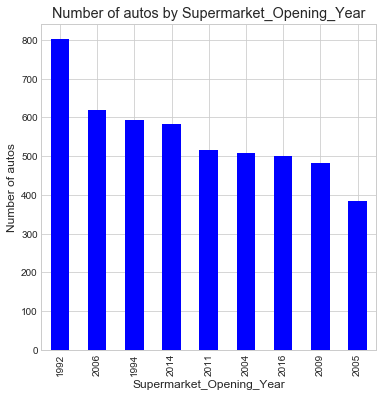

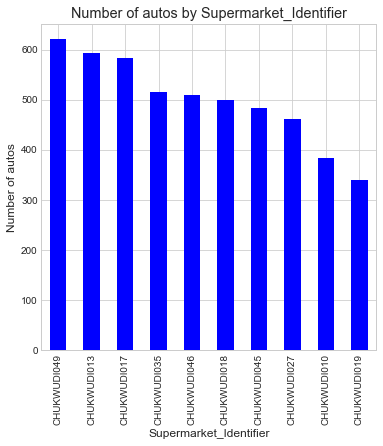

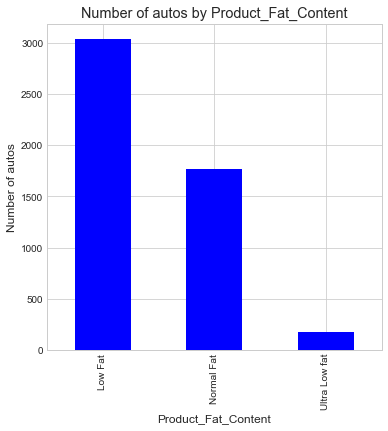

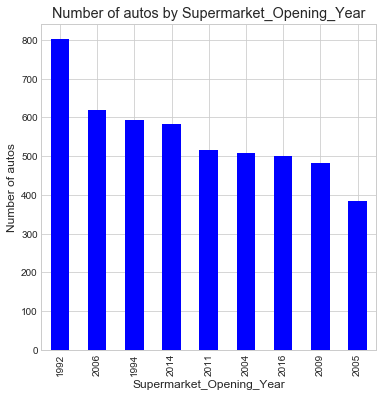

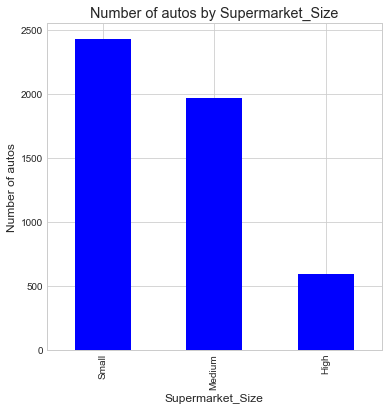

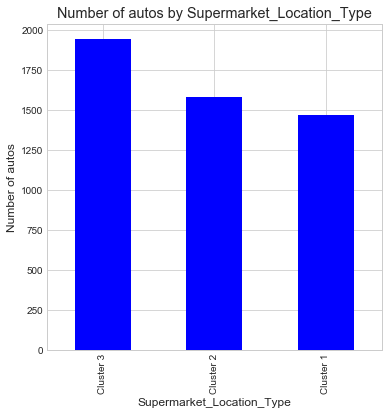

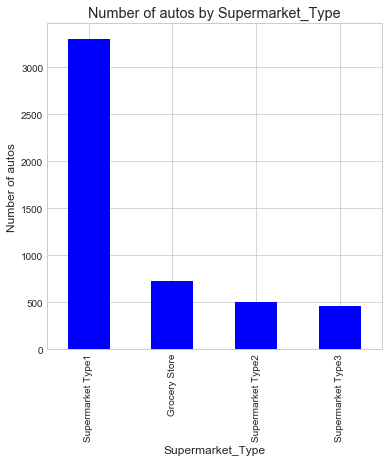

In [286]:
def plot_bars(train_data, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = train_data[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of autos by ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()

cat_cols = ['Supermarket_Opening_Year','Supermarket_Identifier','Product_Fat_Content', 'Supermarket_Opening_Year', 'Supermarket_Size','Supermarket_Location_Type', 'Supermarket_Type']
plot_bars(train_data, cat_cols)  

## DistPlot>>Histogram

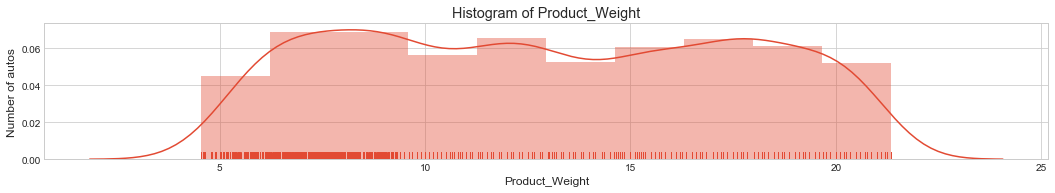

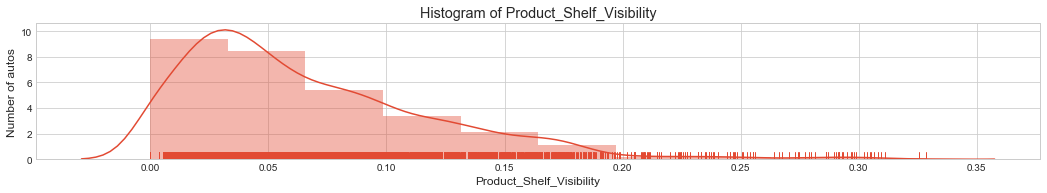

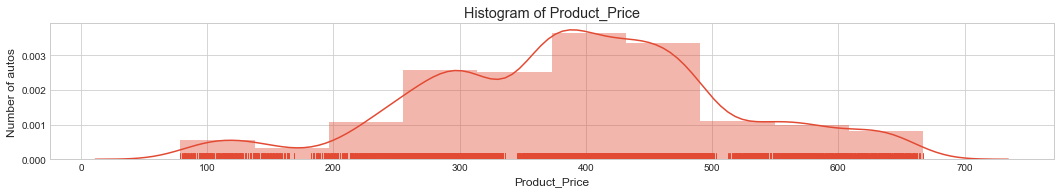

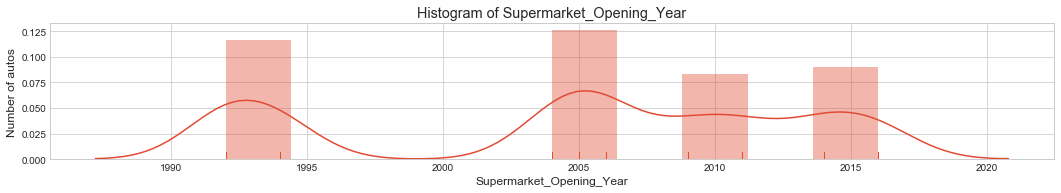

In [284]:
def plot_density_hist(train_data, cols, bins = 10, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(train_data[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
num_cols = ['Product_Weight','Product_Shelf_Visibility','Product_Price', 'Supermarket_Opening_Year']
plot_density_hist(train_data, num_cols)    

## Scatter Plot

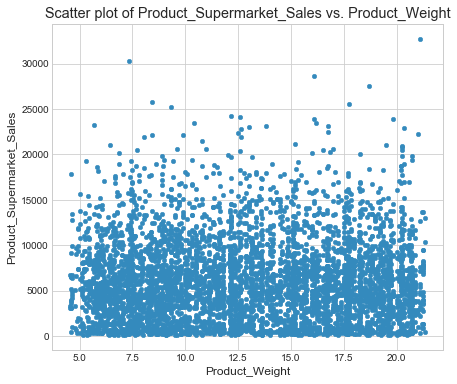

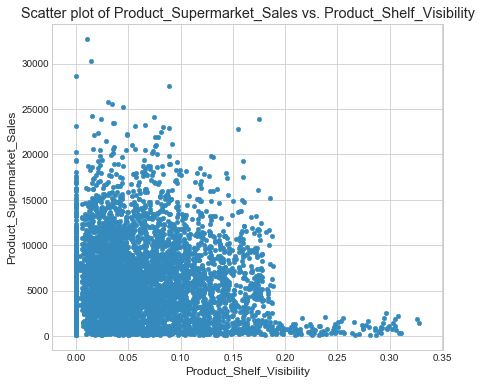

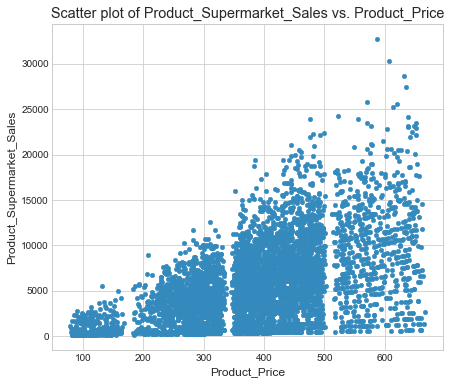

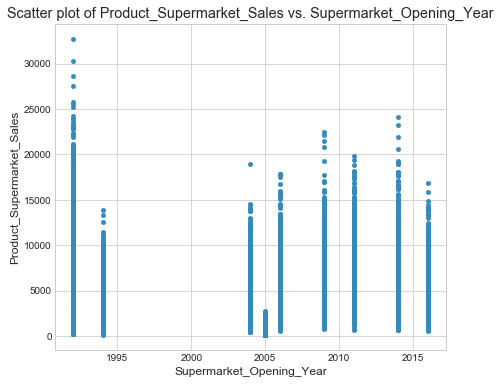

In [285]:
def plot_scatter(train_data, cols, col_y='Product_Supermarket_Sales'):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        train_data.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

plot_scatter(train_data, num_cols) 

## Box Plot

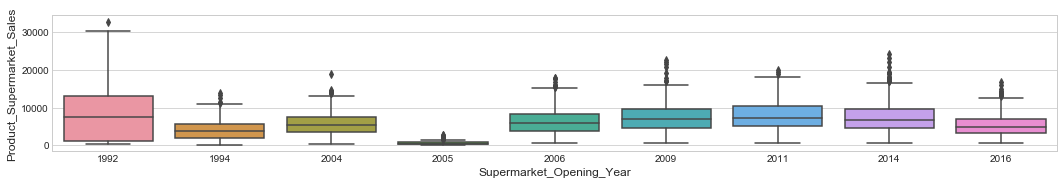

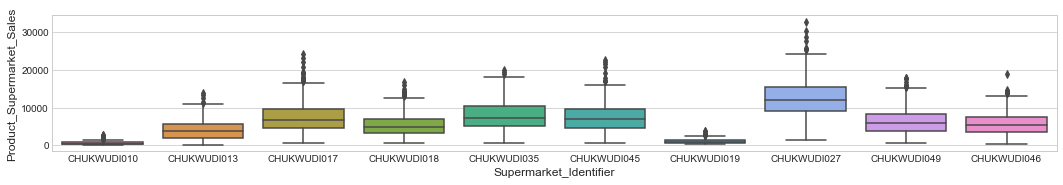

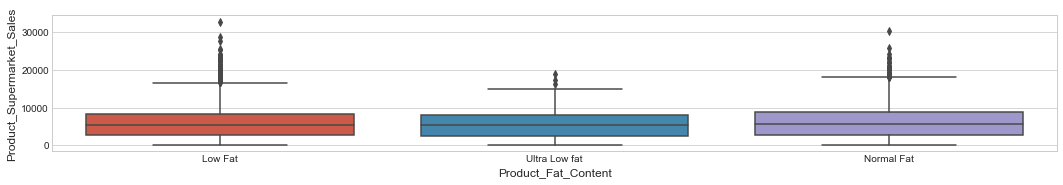

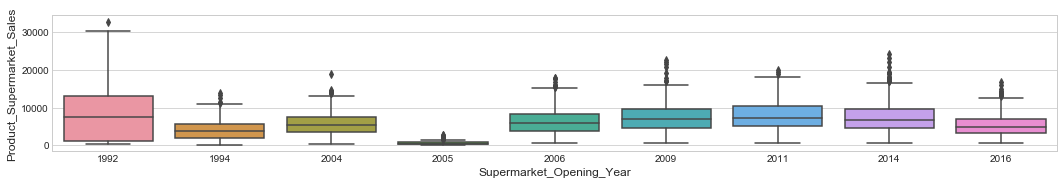

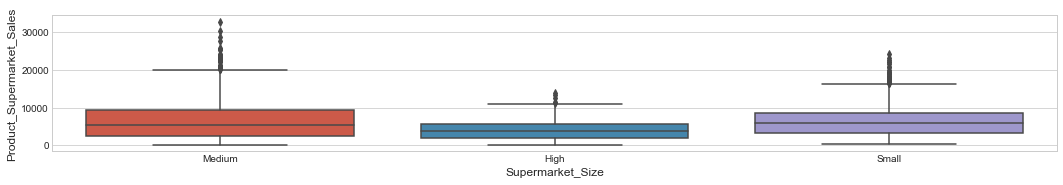

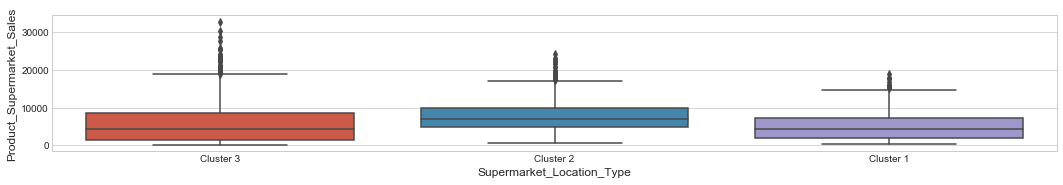

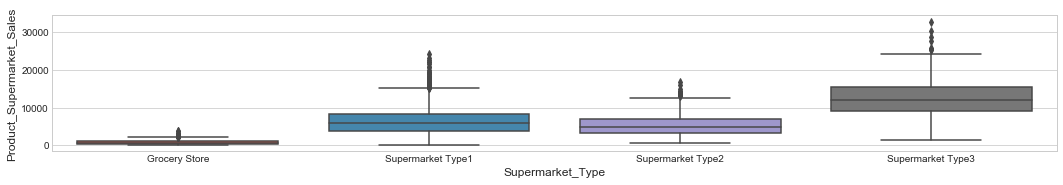

In [287]:
def plot_box(train_data, cols, col_y = 'Product_Supermarket_Sales'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=train_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_box(train_data, cat_cols) 

## Violin Plot

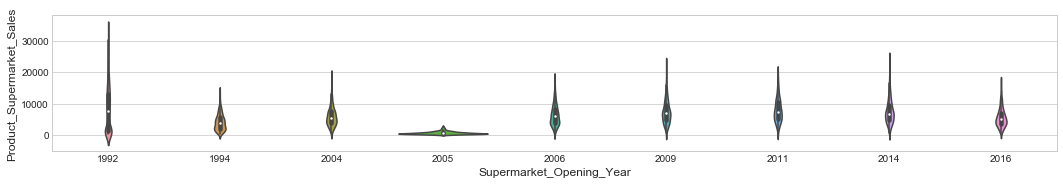

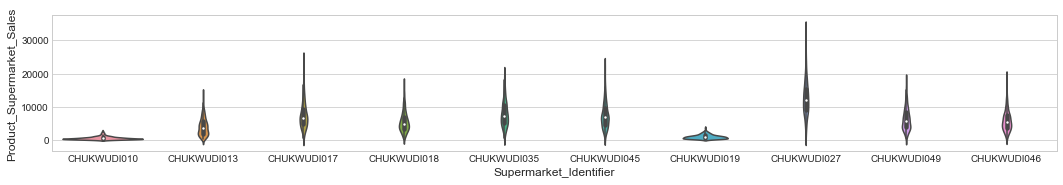

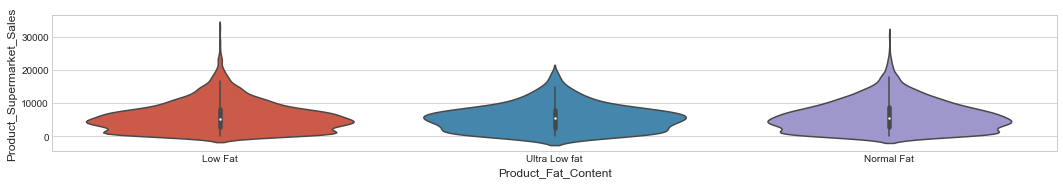

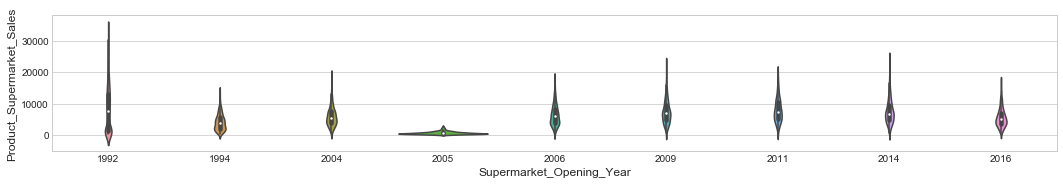

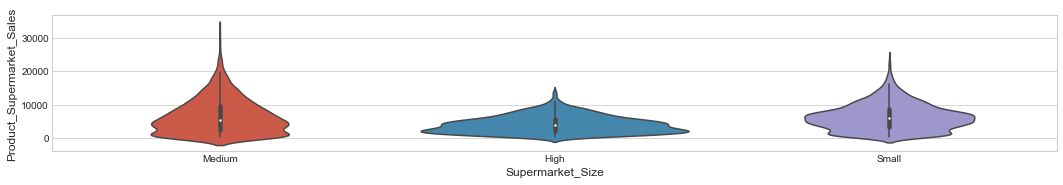

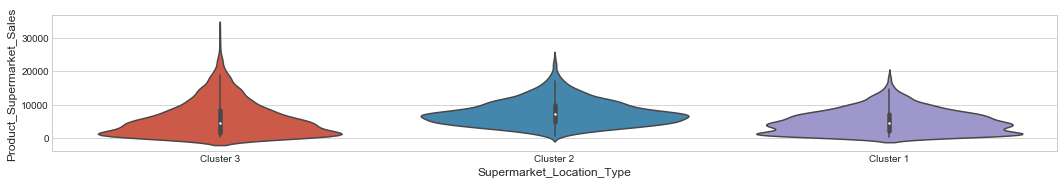

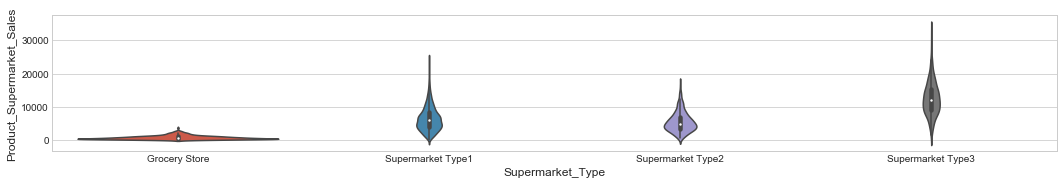

In [289]:
def plot_violin(train_data, cols, col_y = 'Product_Supermarket_Sales'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=train_data)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(train_data, cat_cols)    

## Heat map

C:\Users\onyekachukwu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Users\onyekachukwu\Anaconda3\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


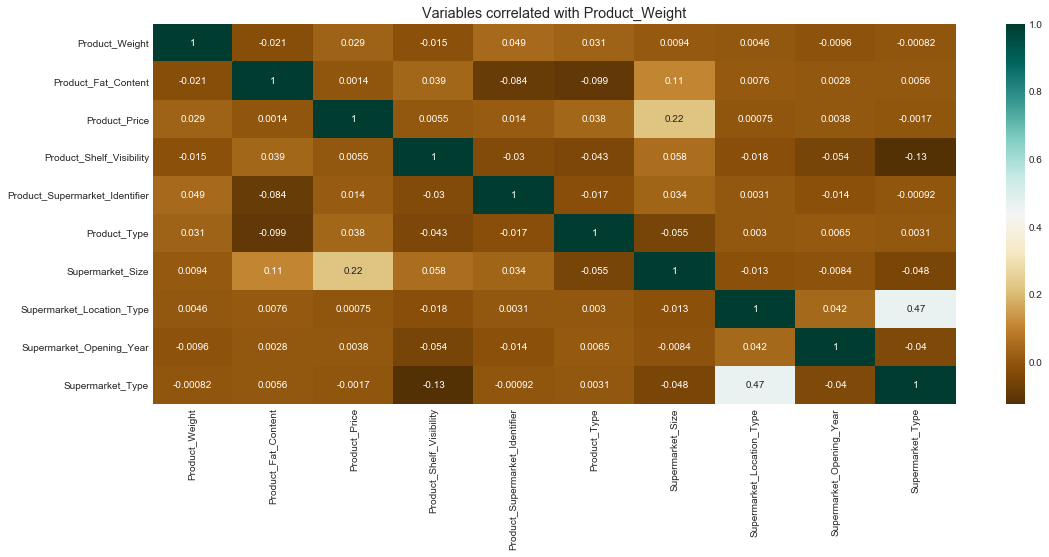

In [298]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Age and if our boxplot interpretation holds true. We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical."""
correlation = merged.loc[:, ['Product_Fat_Content', 'Product_Price','Product_Shelf_Visibility', 'Product_Supermarket_Identifier', 'Product_Type', 'Supermarket_Size', 'Supermarket_Location_Type', 'Supermarket_Opening_Year', 'Supermarket_Type']]
plt.rcParams['figure.figsize'] = [18,7]

from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Product_Weight'] = merged.Product_Weight # Inserting Age in dataframe correlation
correlation = correlation.set_index('Product_Weight').reset_index() # Move Age at index 0.

'''Now create the heatmap correlation.'''
sns.heatmap(correlation.corr(), cmap ='BrBG', annot = True)
plt.title('Variables correlated with Product_Weight')
plt.show()

### Merge some columns

In [11]:
train_data[['Supermarket_Location_Type','Supermarket_Type']][:10]
train_data["Supermarket_Location_Type_&_Supermarket_Type"] = train_data["Supermarket_Location_Type"] + train_data["Supermarket_Type"]

test_data["Supermarket_Location_Type_&_Supermarket_Type"] = test_data["Supermarket_Location_Type"] + train_data["Supermarket_Type"]

In [16]:
train_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales,Supermarket_Location_Type_&_Supermarket_Type
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08,Cluster 3Grocery Store
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,Cluster 3Supermarket Type1
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,Small,Cluster 2,Supermarket Type1,6381.69,Cluster 2Supermarket Type1
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,Cluster 3Supermarket Type2
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,Cluster 2Supermarket Type1


In [12]:
train_data["Supermarket_Type_&_Supermarket_Size"] = train_data["Supermarket_Type"] + train_data["Supermarket_Size"]
train_data["Supermarket_Location_Type_&_Supermarket_Size"] = train_data["Supermarket_Location_Type"] + train_data["Supermarket_Size"]

test_data["Supermarket_Type_&_Supermarket_Size"] = test_data["Supermarket_Type"] + test_data["Supermarket_Size"]
test_data["Supermarket_Location_Type_&_Supermarket_Size"] = test_data["Supermarket_Location_Type"] + test_data["Supermarket_Size"]

In [18]:
train_data.Product_Shelf_Visibility.describe()

count    4990.000000
mean        0.066916
std         0.053058
min         0.000000
25%         0.027273
50%         0.053564
75%         0.095358
max         0.328391
Name: Product_Shelf_Visibility, dtype: float64

In [13]:
'''Create bin categories for Age.'''
#label_names = ['infant','child','teenager','young_adult','adult','aged']
label_names = ['invisible','p_Invisible','p_visible','visible','v_visible1','v_visible2']

'''Create range for each bin categories of Age.'''
#cut_points = [0,5,12,18,35,60,81]
cut_points = [-0.01,0.02,0.04,0.08,0.16,0.20,0.35]

'''Create and view categorized Age with original Age.'''
train_data['Product_Shelf_Visibility_Binned'] = pd.cut(train_data.Product_Shelf_Visibility, cut_points, labels = label_names)
test_data['Product_Shelf_Visibility_Binned'] = pd.cut(test_data.Product_Shelf_Visibility, cut_points, labels = label_names)

display(test_data[['Product_Shelf_Visibility', 'Product_Shelf_Visibility_Binned']].head())

,Product_Shelf_Visibility,Product_Shelf_Visibility_Binned
0,0.214125,v_visible2
1,0.127821,visible
2,0.082171,visible
3,0.011791,invisible
4,0.007038,invisible


In [22]:
#train_data.drop('Product_Shelf_Visibility_Binned', axis=1, inplace=True)
train_data[10:20]

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket_Size,Supermarket_Location_Type,Supermarket_Type,Supermarket_Location_Type_&_Supermarket_Type,Supermarket_Type_&_Supermarket_Size,Supermarket_Location_Type_&_Supermarket_Size,Product_Shelf_Visibility_Binned
10,DRA24,CHUKWUDI027,DRA24_CHUKWUDI027,19.35,Normal Fat,0.039735,Soft Drinks,414.47,1992,Medium,Cluster 3,Supermarket Type3,Cluster 3Supermarket Type3,Supermarket Type3Medium,Cluster 3Medium,p_Invisible
11,DRA24,CHUKWUDI035,DRA24_CHUKWUDI035,19.35,Normal Fat,0.039921,Soft Drinks,408.47,2011,Small,Cluster 2,Supermarket Type1,Cluster 2Supermarket Type1,Supermarket Type1Small,Cluster 2Small,p_Invisible
12,DRA24,CHUKWUDI049,DRA24_CHUKWUDI049,19.35,Normal Fat,0.039990,Soft Drinks,412.72,2006,Medium,Cluster 1,Supermarket Type1,Cluster 1Supermarket Type1,Supermarket Type1Medium,Cluster 1Medium,p_Invisible
13,DRA59,CHUKWUDI017,DRA59_CHUKWUDI017,8.27,Normal Fat,0.000000,Soft Drinks,458.23,2014,Small,Cluster 2,Supermarket Type1,Cluster 2Supermarket Type1,Supermarket Type1Small,Cluster 2Small,invisible
14,DRA59,CHUKWUDI018,DRA59_CHUKWUDI018,8.27,Normal Fat,0.128449,Soft Drinks,466.48,2016,Medium,Cluster 3,Supermarket Type2,Cluster 3Supermarket Type2,Supermarket Type2Medium,Cluster 3Medium,visible
15,DRA59,CHUKWUDI019,DRA59_CHUKWUDI019,8.27,Normal Fat,0.223985,Soft Drinks,465.73,1992,Small,Cluster 1,Grocery Store,Cluster 1Grocery Store,Grocery StoreSmall,Cluster 1Small,v_visible2
16,DRA59,CHUKWUDI027,DRA59_CHUKWUDI027,8.27,Normal Fat,0.127308,Soft Drinks,466.73,1992,Medium,Cluster 3,Supermarket Type3,Cluster 3Supermarket Type3,Supermarket Type3Medium,Cluster 3Medium,visible
17,DRA59,CHUKWUDI046,DRA59_CHUKWUDI046,8.27,Normal Fat,0.127928,Soft Drinks,462.23,2004,Small,Cluster 1,Supermarket Type1,Cluster 1Supermarket Type1,Supermarket Type1Small,Cluster 1Small,visible
18,DRA59,CHUKWUDI049,DRA59_CHUKWUDI049,8.27,Normal Fat,0.128127,Soft Drinks,459.23,2006,Medium,Cluster 1,Supermarket Type1,Cluster 1Supermarket Type1,Supermarket Type1Medium,Cluster 1Medium,visible
19,DRB01,CHUKWUDI027,DRB01_CHUKWUDI027,7.39,Low Fat,0.081841,Soft Drinks,475.13,1992,Medium,Cluster 3,Supermarket Type3,Cluster 3Supermarket Type3,Supermarket Type3Medium,Cluster 3Medium,visible


In [ ]:
train_data.drop('Product_Supermarket_Sales', axis=1, inplace=True)

#### Having removed the labels column, saved the remaining features

In [14]:
test_data.to_csv('TestFeatures4Trees1.csv', index=False)

In [ ]:
train_data.to_csv('TrainFeatures4Trees1.csv', index=False)

In [34]:
"""Let's count the missing values for each variable."""
bold('**Missing values for each variable:**')
display(train_data.isnull().sum())

**Missing values for each variable:**

Product_Identifier                              0
Supermarket_Identifier                          0
Product_Supermarket_Identifier                  0
Product_Weight                                  0
Product_Fat_Content                             0
Product_Shelf_Visibility                        0
Product_Type                                    0
Product_Price                                   0
Supermarket_Opening_Year                        0
Supermarket_Size                                0
Supermarket_Location_Type                       0
Supermarket_Type                                0
Supermarket_Location_Type_&_Supermarket_Type    0
Supermarket_Type_&_Supermarket_Size             0
Supermarket_Location_Type_&_Supermarket_Size    0
Product_Shelf_Visibility_Binned                 0
dtype: int64

In [37]:
train_data.Product_Price.describe()

count    4990.000000
mean      391.803796
std       119.378259
min        78.730000
25%       307.890000
50%       393.860000
75%       465.067500
max       667.220000
Name: Product_Price, dtype: float64

In [17]:
sub = pd.read_csv('SampleSubmission.csv')

sub.head()

,Product_Supermarket_Identifier,Product_Supermarket_Sales
0,DRA59_CHUKWUDI010,100
1,DRA59_CHUKWUDI013,100
2,DRB01_CHUKWUDI013,100
3,DRB13_CHUKWUDI010,100
4,DRB13_CHUKWUDI013,100
